In [1]:
import pickle
from pylab import *
import matplotlib.image as mpimg
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import h5py
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde
from fluxCuts import getOVCBoundaries

In [2]:
with open('/data/chocula/villaa/PhotoN_SuperSim/possys/flux_data_0x0009_large_v4.pkl','rb') as readFile:
      data=pickle.load(readFile,encoding='latin1')

print(data.keys())

dict_keys(['costhet_2dvert', 'costhet_2dhori', 'pz', 'px', 'py', 'ptype', 'EventNum', 'y', 'color', 'costhet_3d', 'time', 'Edep', 'x', 'z', 'outflux_kde', 'inout', 'volname'])


In [3]:
#calculate some cuts

cIn = np.zeros(np.shape(data['x']),dtype=bool)
cIn[(data['inout']==1)] = True

cOut = np.zeros(np.shape(data['x']),dtype=bool)
cOut[(data['inout']==2)] = True

cInandOut = np.zeros(np.shape(data['x']),dtype=bool)
cInandOut[(data['inout']==3)] = True

cRand10p = np.zeros(np.shape(data['x']),dtype=bool)
randvec = np.random.rand(*np.shape(data['x']))
cRand10p[randvec>0.9] = True

r2d = np.sqrt(data['x']**2+data['y']**2)
cROVC = np.zeros(np.shape(data['x']),dtype=bool)
cROVC[r2d<0.25] = True

cToCenter3d = np.zeros(np.shape(data['x']),dtype=bool)
cToCenter3d[data['costhet_3d']>0] = True

cDown = np.zeros(np.shape(data['x']),dtype=bool)
cDown[data['costhet_2dhori']>0] = True

In [4]:
#trying to customize here, see:
#https://matplotlib.org/users/customizing.html
#matplotlib.rc('figure', figsize=(3.4, 3.4*(4/6)))
mpl.rcParams['lines.linewidth'] = 2

#ticks
mpl.rcParams['xtick.top'] = False
mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['xtick.labelsize'] = 22

mpl.rcParams['ytick.left'] = True
mpl.rcParams['ytick.right'] = False
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['ytick.minor.size'] = 4
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.labelsize'] = 22


#error bars
#mpl.rcParams['errorbar.capsize'] = 3

#axis stuff
mpl.rcParams['axes.labelsize'] = 22

#fonts
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'32'}
legend_font = {'fontname':'Arial', 'size':'22'}

#fonts global settings
mpl.rc('font',family=legend_font['fontname'])

In [5]:
#set up a plot
fig = plt.figure(figsize=(12,10),frameon=False)
ax1 = fig.add_subplot(111, projection='3d')
#fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),projection='3d')
#ax1 = axes[0]

#lay out the colors
rgb_r = (255/255.0,0/255.0,0/255.0)
rgb_b = (0/255.0,0/255.0,255/255.0)
rgb_o = (255/255.0,127/255.0,0/255.0)
rgb_b = (31/255.0,120/255.0,180/255.0)
rgb_lr = (251/255.0,154/255.0,153/255.0)
rgb_g = (203/255.0,195/255.0,195/255.0)



x = data['x'][(cOut|cInandOut)&cRand10p]
y = data['y'][(cOut|cInandOut)&cRand10p]
z = data['z'][(cOut|cInandOut)&cRand10p]
color = data['color'][(cOut|cInandOut)&cRand10p]


#ax1.scatter(data['x'][(incut==1)&(randcut==1)], data['y'][(incut==1)&(randcut==1)], data['z'][(incut==1)&(randcut==1)], s=1,c='r', marker='o',label='inward')
s = ax1.scatter(x, y, z, s=1,c=color, marker='o',label='outward',cmap='inferno')



#ax1.set_yscale('linear')
ax1.set_xlim(-0.5, 0.5)
ax1.set_ylim(-0.5,0.5)
ax1.set_zlim(0.1,1.1) # try to make the aspect ratio 1:1:1
ax1.set_xlabel('sim X pos. [m]',labelpad=20,**axis_font) #labelpad is distance of axis to label
ax1.set_ylabel('sim Y pos. [m]',labelpad=20,**axis_font)
ax1.set_zlabel('sim Z pos. [m]',labelpad=20,**axis_font)
#ax1.grid(True)
#ax1.yaxis.grid(True,which='minor',linestyle='--')

#lgnd= ax1.legend(loc=2,prop={'size':22})
#lgnd.legendHandles[0]._sizes = [30]
#lgnd.legendHandles[1]._sizes = [30]

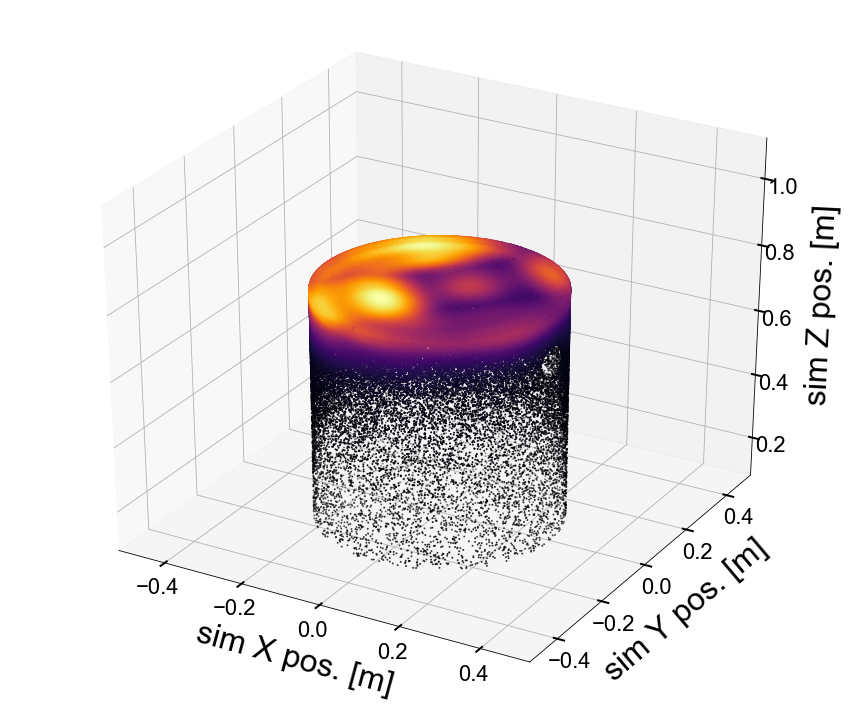

In [6]:
plt.tight_layout()
plt.savefig('figures/GammaFlux_OVC_heat.png')
#plt.colorbar(s[3],fraction=0.046,pad=0.04)
plt.show()

In [7]:
#set up a 2-d plot

fig,axes = plt.subplots(1,1,figsize=(17.0,17.0),frameon=False)
ax1 = axes

#need to play with axis
mpl.rcParams['ytick.minor.visible'] = False

x2 = data['x'][(cOut|cInandOut)&cROVC&cDown]
y2 = data['y'][(cOut|cInandOut)&cROVC&cDown]

#h = ax1.hist2d(x2,y2, bins=100, norm=LogNorm(), cmap='inferno')
h = ax1.hist2d(x2,y2, bins=200, cmap='inferno')

#Recall from N-MISC-16-001 pg 33 the position of the source
d = 8.1534 #cm
d*=(1/100.0)
xsrc = d*np.cos(60*(np.pi/180.0)) #60 deg
ysrc = d*np.sin(60*(np.pi/180.0)) #60 deg


#make a circle for primary location
npts = 100
rcirc = 0.1
thet = np.arange(npts)*(2*np.pi/np.float(npts))
xsrc = np.ones(np.shape(thet))*xsrc
ysrc = np.ones(np.shape(thet))*ysrc
xcirc = xsrc + rcirc*np.cos(thet)
ycirc = ysrc + rcirc*np.sin(thet)

rA = 0.25

#make a line for location B
rB = 0.25
deg0B = 255*(np.pi/180.0) #do a 230 deg start line
deg1B = 25*(np.pi/180.0) #do a 20 deg end line
x0B = rA*np.cos(deg0B)
y0B = rA*np.sin(deg0B)
x1B = rA*np.cos(deg1B)
y1B = rA*np.sin(deg1B)
mB = (y1B-y0B)/(x1B-x0B)
bB = y0B - mB*x0B
xlineB = np.ones(np.shape(np.arange(npts)))*x0B + np.arange(npts)*(x1B-x0B)/(np.float(npts))
ylineB = mB*xlineB + np.ones(np.shape(np.arange(npts)))*bB
fullthetB = (360-255+25)*(np.pi/180.0) #do a 20 deg arc
thetB = np.arange(npts)*(fullthetB/np.float(npts))
thetB0 = 255*(np.pi/180.0) #starting at 50 deg
thetB0 = np.ones(np.shape(thetB))*thetB0
thetB = thetB0 + thetB
xB = rA*np.cos(thetB)
yB = rA*np.sin(thetB)
xB = np.concatenate((xB,np.flip(xlineB,0)),0)
yB = np.concatenate((yB,np.flip(ylineB,0)),0)



#make a line for location D
rD = 0.25
deg0D = 80*(np.pi/180.0) #do a 80 deg start line
deg1D = 195*(np.pi/180.0) #do a 170 deg end line
x0D = rD*np.cos(deg0D)
y0D = rD*np.sin(deg0D)
x1D = rD*np.cos(deg1D)
y1D = rD*np.sin(deg1D)
mD = (y1D-y0D)/(x1D-x0D)
bD = y0D - mD*x0D
xlineD = np.ones(np.shape(np.arange(npts)))*x0D + np.arange(npts)*(x1D-x0D)/(np.float(npts))
ylineD = mD*xlineD + np.ones(np.shape(np.arange(npts)))*bD
fullthetD = (deg1D-deg0D) #do a X deg arc
thetD = np.arange(npts)*(fullthetD/np.float(npts))
thetD0 = 80*(np.pi/180.0) #starting at 50 deg
thetD0 = np.ones(np.shape(thetD))*thetD0
thetD = thetD0 + thetD
xD = rD*np.cos(thetD)
yD = rD*np.sin(thetD)
xD = np.concatenate((xD,np.flip(xlineD,0)),0)
yD = np.concatenate((yD,np.flip(ylineD,0)),0)


#make a semicircle for location A
rA = 0.25
deg0A = 7*(np.pi/180.0) #do a 7 deg start line
deg1A = 90*(np.pi/180.0) #do a 90 deg end line
x0A = rA*np.cos(deg0A)
y0A = rA*np.sin(deg0A)
x1A = rA*np.cos(deg1A)
y1A = rA*np.sin(deg1A)
mA = (y1A-y0A)/(x1A-x0A)
bA = y0A - mA*x0A
xlineA = np.ones(np.shape(np.arange(npts)))*x0A + np.arange(npts)*(x1A-x0A)/(np.float(npts))
ylineA = mA*xlineA + np.ones(np.shape(np.arange(npts)))*bA


xAB = (bB-bA)/(mA-mB) #find cross-over point with B
xAD = (bD-bA)/(mA-mD) #find cross-over point with D
xlineAr = xlineA[(xlineA<xAB)&(xlineA>xAD)] #restrict to end at line of B and D
ylineAr = ylineA[(xlineA<xAB)&(xlineA>xAD)]
xlineA = xlineAr

xlineArr = np.concatenate((xlineD[xlineD>xAD],np.flip(xlineAr,0),xlineB[xlineB>xAB]),0)
ylineArr = np.concatenate((ylineD[xlineD>xAD],np.flip(ylineAr,0),ylineB[xlineB>xAB]),0)

fullthetA = (deg0D-deg1B)
thetA = np.arange(npts)*(fullthetA/np.float(npts))
thetA0 = deg1B
thetA0 = np.ones(np.shape(thetA))*thetA0
thetA = thetA0 + thetA
xA = rA*np.cos(thetA)
yA = rA*np.sin(thetA)
xlineAfull = np.concatenate((xA,xlineArr))
ylineAfull = np.concatenate((yA,ylineArr))


#make a semicircle for location C
rC = 0.25
deg0C = 145*(np.pi/180.0) #do a 7 deg start line
deg1C = 310*(np.pi/180.0) #do a 90 deg end line
x0C = rC*np.cos(deg0C)
y0C = rC*np.sin(deg0C)
x1C = rC*np.cos(deg1C)
y1C = rC*np.sin(deg1C)
mC = (y1C-y0C)/(x1C-x0C)
bC = y0C - mC*x0C
xlineC = np.ones(np.shape(np.arange(npts)))*x0C + np.arange(npts)*(x1C-x0C)/(np.float(npts))
ylineC = mC*xlineC + np.ones(np.shape(np.arange(npts)))*bC

xCB = (bB-bC)/(mC-mB) #find cross-over point with B
xCD = (bD-bC)/(mC-mD) #find cross-over point with D
xlineCr = xlineC[(xlineC<xCB)&(xlineC>xCD)] #restrict to end at line of B and D
ylineCr = ylineC[(xlineC<xCB)&(xlineC>xCD)]

xlineCrr = np.concatenate((xlineB[xlineB<xCB],np.flip(xlineCr,0),xlineD[xlineD<xCD]),0)
ylineCrr = np.concatenate((ylineB[xlineB<xCB],np.flip(ylineCr,0),ylineD[xlineD<xCD]),0)

fullthetC = (deg0B-deg1D) #do a X deg arc
thetC = np.arange(npts)*(fullthetC/np.float(npts))
thetC0 = deg1D
thetC0 = np.ones(np.shape(thetC))*thetC0
thetC = thetC0 + thetC
xC = rC*np.cos(thetC)
yC = rC*np.sin(thetC)
xlineCfull = np.concatenate((xC,xlineCrr))
ylineCfull = np.concatenate((yC,ylineCrr))

bdr = getOVCBoundaries(data['x'],data['y'])


ax1.plot(bdr['Pr']['x'], bdr['Pr']['y'], 'r--', linewidth=1.5, label='Primary Loc.')
ax1.plot(bdr['A']['x'], bdr['A']['y'],linestyle='--', color=rgb_o, linewidth=1.5, label='Loc. A')
ax1.plot(bdr['B']['x'], bdr['B']['y'], 'g--', linewidth=1.5, label='Loc. B')
ax1.plot(bdr['C']['x'], bdr['C']['y'],linestyle='--', color=rgb_lr, linewidth=1.5, label='Loc. C')
ax1.plot(bdr['D']['x'], bdr['D']['y'], linestyle='--', color=rgb_b, linewidth=1.5, label='Loc. D')

inout = np.zeros(np.shape(data['x']))
inout[(cOut|cInandOut)] = 1
print('out of {0:d} events we have {1:d} going outward'.format(np.int(np.size(inout)),np.int(np.sum(inout))))

#ax1.set_yscale('linear')
ax1.set_xlim(-0.25, 0.25)
ax1.set_ylim(-0.25,0.25)
ax1.set_xlabel('sim X pos. [m]',**axis_font) 
ax1.set_ylabel('sim Y pos. [m]',**axis_font)
#ax1.set_zlabel('sim Z pos. [m]',labelpad=20,**axis_font)
ax1.grid(True)
#ax1.yaxis.grid(True,which='minor',linestyle='--')
#equal aspect ratio:
#https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_aspect.html
ax1.set_aspect('equal')

lgnd= ax1.legend(loc=2,prop={'size':22})

out of 2063315 events we have 2063315 going outward


In [8]:
for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

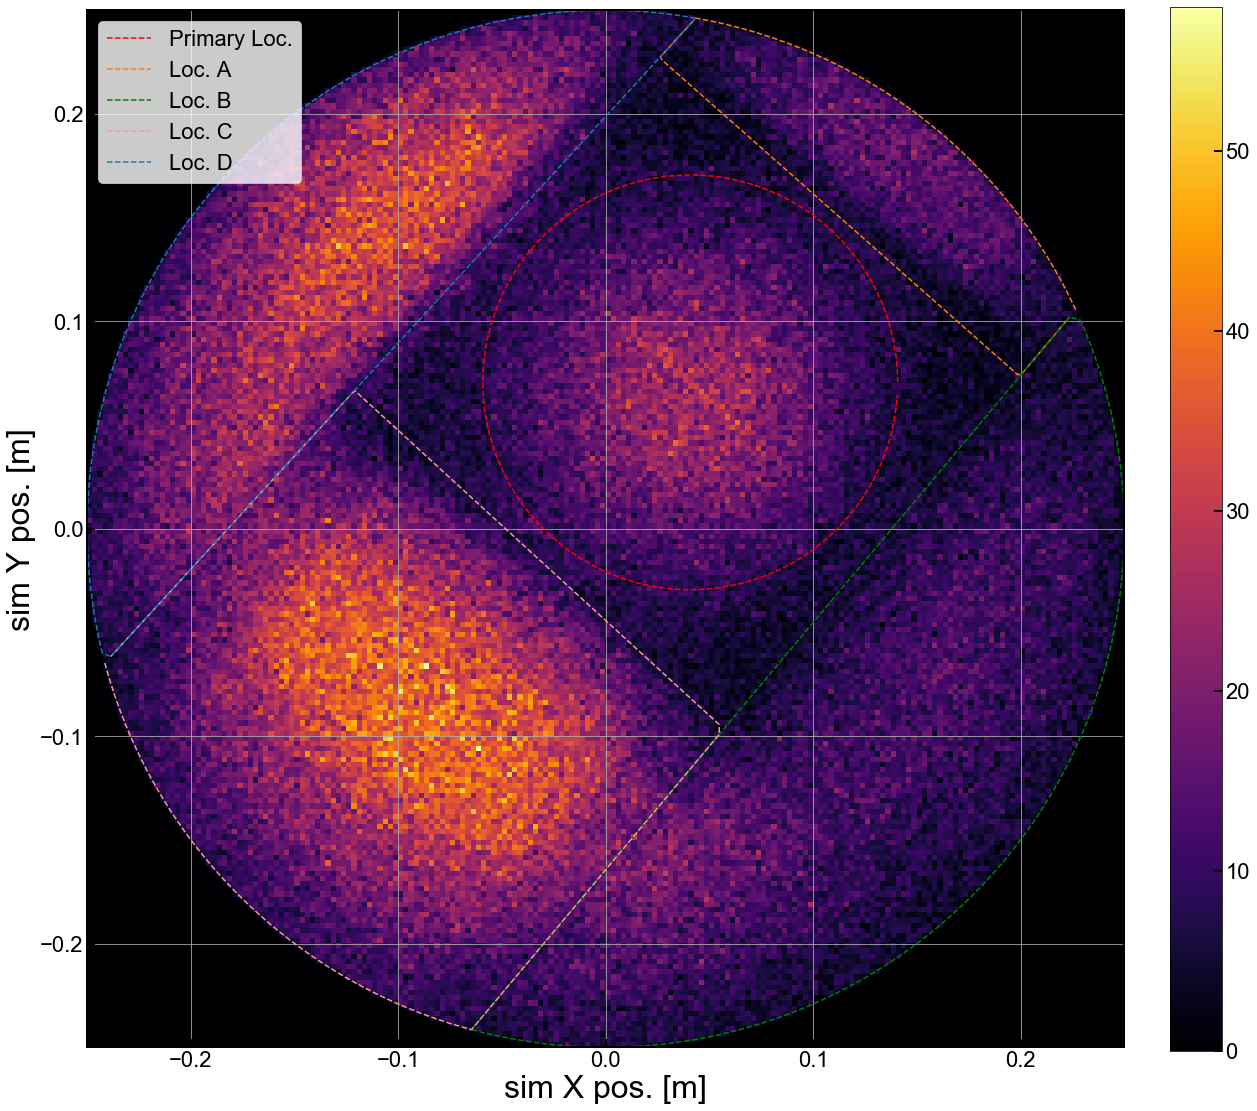

In [9]:
plt.tight_layout()
#plt.savefig('figures/GammaFlux_Brick_bot-lt0.85m.eps')
plt.colorbar(h[3],fraction=0.046,pad=0.04)
plt.show()